### Importing the Required Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score

### Loading the Dataset

In [2]:
dfa = pd.read_csv("data/mall_customers.csv")
dfa.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Cleaning and Filtering the Data

In [3]:
dfa.dropna()
dfa = dfa[['Age','Annual Income (k$)','Spending Score (1-100)']]
print('Total Row : ', len(dfa))

Total Row :  200


### Standardize features by removing the mean and scaling to unit variance

In [4]:
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

### Declaring and calling K-Means

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)

In [6]:
labels = kmeans.labels_

In [9]:
print("Homogeneity: %0.3f" % homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % v_measure_score(labels, kmeans.labels_))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


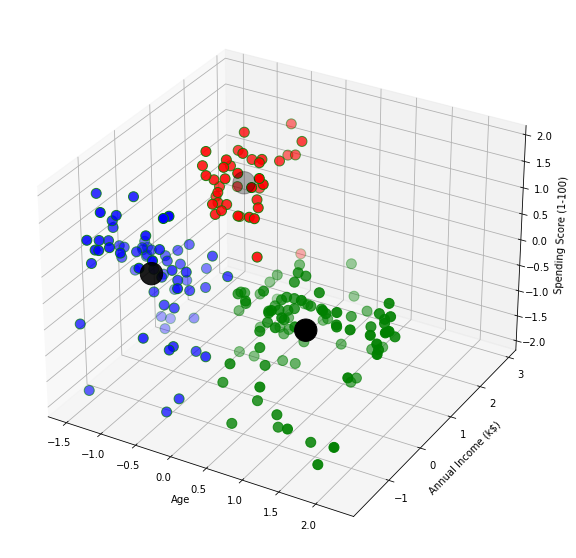

In [8]:
new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)','Spending Score (1-100)'])
new_dfa['label_kmeans'] = labels
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 0], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 0], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 0], c='blue', s=100, edgecolor='green')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 1], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 1], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 1], c='red', s=100, edgecolor='green')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 2], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 2], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 2], c='green', s=100, edgecolor='green')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 3], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 3], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 3], c='orange', s=100, edgecolor='green')
ax.scatter(new_dfa.Age[new_dfa.label_kmeans == 4], new_dfa["Annual Income (k$)"][new_dfa.label_kmeans == 4], new_dfa["Spending Score (1-100)"][new_dfa.label_kmeans == 4], c='purple', s=100, edgecolor='green')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=500);
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()